In [ ]:
!pip3 install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
!pip3 install pylatexenc

In [92]:
import qiskit
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [86]:
def exec_circuit(circuit, backend=Aer.get_backend('qasm_simulator')):
    res = execute(circuit, backend).result()
    return res, res.get_counts()

def create_adder(init_state=None, qbits=None):
    n_q = 3
    n_m = 1
    circ = QuantumCircuit(n_q,n_m)
    if init_state != None and qbits != None:
        circ.initialize(init_state,qbits)
    circ.cnot(0,2)
    circ.cnot(1,2)
    circ.measure(2,0)
    return circ

### Simple circuit to calculate sum mod 2

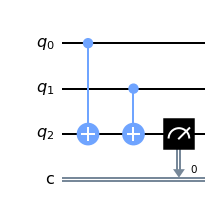

In [88]:
circ = create_adder()
circ.draw()

### Now run the circuit on all possible inputs
That is 00,01,10,11. The circuit calculates $$ (x_1 + x_2) mod $$ 2.
Bear in mind that the inputs is the tensor of $$q_0$$ and $$q_1$$. So 00 = $$\pmatrix{1\\0\\0\\0} $$

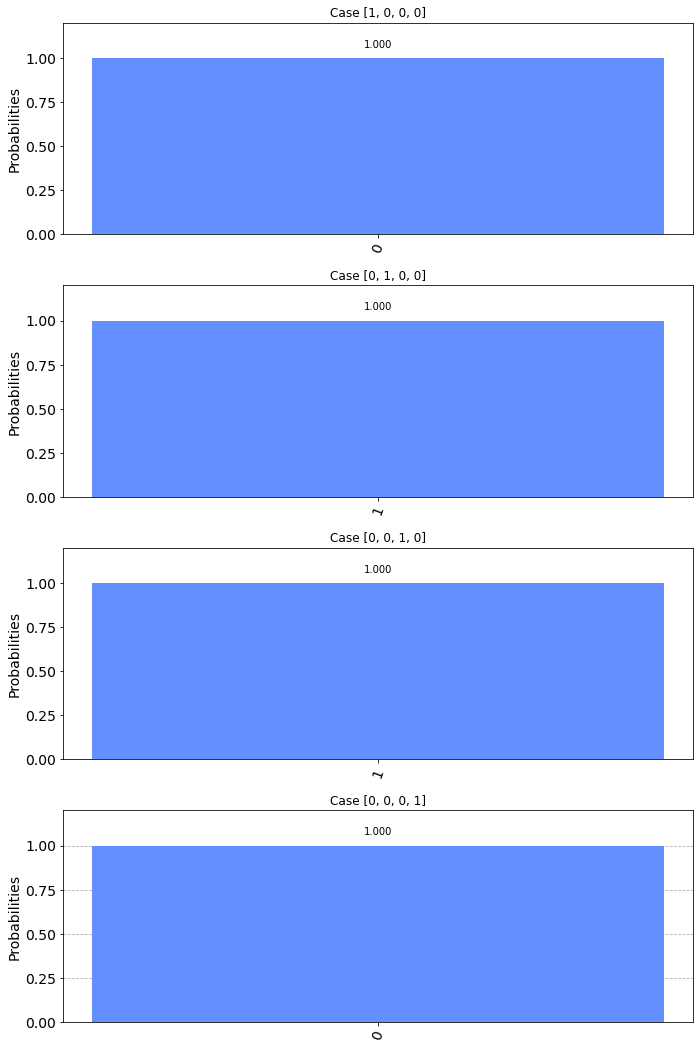

In [131]:
n = 2
N = pow(2,n)
f, ax = plt.subplots(N, figsize=(10,15))
f.subplots_adjust(wspace=0.9)
f.tight_layout(pad=3)
for i in range(0,N):
    s = [0] * N
    s[i] = 1
    circ = create_adder(s, [0,1])
    res, cts = exec_circuit(circ)
    ax[i].set_title(f'Case {s}')
    plot_histogram(cts, ax=ax[i])